PART-1,2,3 (COMPLETED)


In [119]:
import pandas as pd

metadata_path = '/kaggle/input/meta-data/meta_Electronics.json'
reviews_path = '/kaggle/input/electronics-5/Electronics_5.json'
output_path = '/kaggle/working/headphones.json'


In [ ]:
def load_and_filter_metadata(metadata_path):
    headphones_asins = set()
    chunk_size = 10000
    try:
        for chunk in pd.read_json(metadata_path, lines=True, chunksize=chunk_size):
            headphones_chunk = chunk[chunk['category'].apply(lambda x: 'Headphones' in str(x))]
            headphones_asins.update(headphones_chunk['asin'].unique())
    except Exception as e:
        print(f"Error loading or processing metadata: {e}")
    return headphones_asins


In [ ]:
def filter_reviews(reviews_path, headphones_asins):
    chunk_size = 5000  
    filtered_reviews = pd.DataFrame()
    for chunk in pd.read_json(reviews_path, lines=True, chunksize=chunk_size):
        chunk_filtered = chunk[chunk['asin'].isin(headphones_asins)]
        filtered_reviews = pd.concat([filtered_reviews, chunk_filtered], ignore_index=True)
    return filtered_reviews

PART-3

In [ ]:


def preprocess_reviews(df):
    df.dropna(subset=['reviewText', 'overall'], inplace=True)
    df.drop_duplicates(subset=['reviewerID', 'asin'], inplace=True)
    return df

In [ ]:
def save_reviews(df, output_path):
    df.to_json(output_path, orient='records', lines=True)

In [ ]:
headphones_asins = load_and_filter_metadata(metadata_path)

filtered_reviews = filter_reviews(reviews_path, headphones_asins)

preprocessed_reviews = preprocess_reviews(filtered_reviews)

save_reviews(preprocessed_reviews, output_path)

print("Headphone reviews preprocessing complete. Data saved to:", output_path)

PART-4
Obtaining the Descriptive Statistics of the product

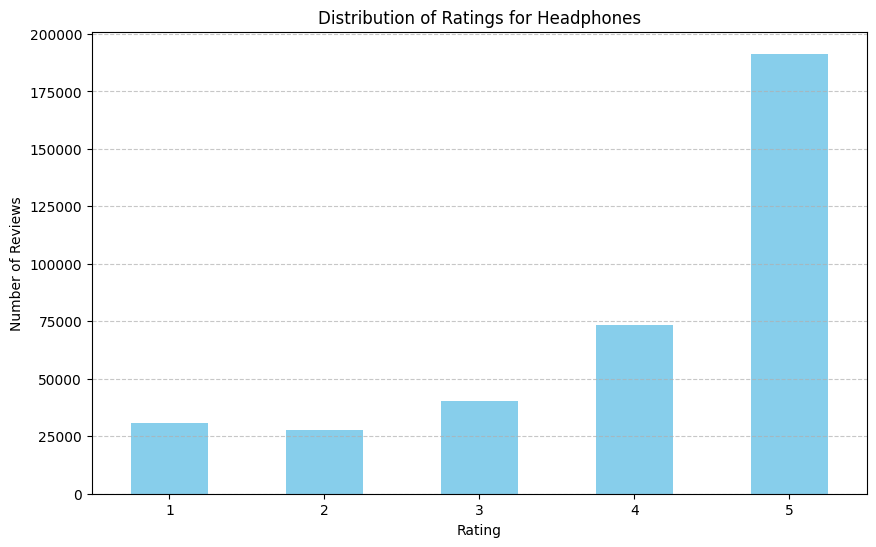

Number of Reviews: 364050
Average Rating Score: 4.01
Number of Unique Products: 8135
Number of Good Ratings: 305314
Number of Bad Ratings: 58736
Number of Reviews corresponding to each Rating:
overall
1     30910
2     27826
3     40550
4     73349
5    191415
Name: count, dtype: int64


In [128]:
import matplotlib.pyplot as plt

df = pd.read_json('headphones.json', lines=True)

# a. Number of Reviews
number_of_reviews = len(df)

# b. Average Rating Score
average_rating = df['overall'].mean()

# c. Number of Unique Products
unique_products = df['asin'].nunique()

# d. Number of Good Ratings (>=3)
good_ratings = df[df['overall'] >= 3]['overall'].count()

# e. Number of Bad Ratings (<3)
bad_ratings = df[df['overall'] < 3]['overall'].count()

# f. Number of Reviews corresponding to each Rating
reviews_per_rating = df['overall'].value_counts().sort_index()

df['overall'].value_counts().sort_index().plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Distribution of Ratings for Headphones')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Displaying the statistics
print(f"Number of Reviews: {number_of_reviews}")
print(f"Average Rating Score: {average_rating:.2f}")
print(f"Number of Unique Products: {unique_products}")
print(f"Number of Good Ratings: {good_ratings}")
print(f"Number of Bad Ratings: {bad_ratings}")
print("Number of Reviews corresponding to each Rating:")
print(reviews_per_rating)


PART-5
Preprocess the Text

In [150]:
import nltk



In [155]:
df = pd.read_json('headphones.json', lines=True)

In [154]:
def nltk_pos_tag_to_penn_pos(nltk_pos_tag):
    if nltk_pos_tag.startswith('J'):
        return 'ADJ'
    elif nltk_pos_tag.startswith('V'):
        return 'VERB'
    elif nltk_pos_tag.startswith('N'):
        return 'NOUN'
    elif nltk_pos_tag.startswith('R'):
        return 'ADV'
    else:
        return None

def lemmatize_sentence(sentence):
    from nltk.stem import WordNetLemmatizer
    lemmatizer = WordNetLemmatizer()

    nltk_pos_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))
    penn_pos_tagged = [(word, nltk_pos_tag_to_penn_pos(pos_tag)) for word, pos_tag in nltk_pos_tagged]
    lemmatized_sentence = []
    for word, pos in penn_pos_tagged:
        if pos is None:
            lemmatized_sentence.append(word)
        else:
            lemmatized_sentence.append(lemmatizer.lemmatize(word, pos=pos.lower()))
    return " ".join(lemmatized_sentence)

In [142]:
def lemmatize_sentence(sentence):
    nltk_pos_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))
    wordnet_pos_tagged = map(lambda x: (x[0], nltk_pos_tag_to_wordnet_pos(x[1])), nltk_pos_tagged)
    lemmatized_sentence = []
    for word, pos in wordnet_pos_tagged:
        if pos is None:
            lemmatized_sentence.append(word)
        else:
            lemmatized_sentence.append(lemmatizer.lemmatize(word, pos))
    return " ".join(lemmatized_sentence)

lemmatizer = WordNetLemmatizer()

In [143]:
acronym_mapping = {
    "nlp": "natural language processing",
    "ml": "machine learning",
    "ai": "artificial intelligence",
    "api": "application programming interface",
    "db": "database",
    "gui": "graphical user interface",
    "http": "hypertext transfer protocol",
    "https": "hypertext transfer protocol secure",
    "sql": "structured query language",
    "json": "javascript object notation",
    "xml": "extensible markup language",
    "ui": "user interface",
    "ux": "user experience",
    "os": "operating system",
    "cpu": "central processing unit",
    "gpu": "graphics processing unit",
    "iot": "internet of things",
    "asap": "as soon as possible",
    "faq": "frequently asked questions",
    "idk": "I don't know",
    "fyi": "for your information",
    "btw": "by the way",
    "imo": "in my opinion",
    "imho": "in my humble opinion",
    "brb": "be right back",
    "ttyl": "talk to you later",
    "lol": "laugh out loud",
    "omg": "oh my god",
    "tba": "to be announced",
    "tbd": "to be determined",
    "rsvp": "répondez s'il vous plaît",
    "diy": "do it yourself",
    "smh": "shaking my head",
    "n't": " not",
    "'re": " are",
    "'s": " is",
    "'d": " would",
    "'ll": " will",
    "'t": " not",
    "'ve": " have",
    "'m": " am"
}

In [172]:
import re
from bs4 import BeautifulSoup
import unicodedata
from nltk.stem import PorterStemmer

# Initialize Porter Stemmer
stemmer = PorterStemmer()

# Define acronym mapping if necessary
acronym_mapping = {}

def expand_acronyms(text):
    words = text.split()
    expanded_words = [acronym_mapping.get(word, word) for word in words]
    return " ".join(expanded_words)

def preprocess_text(text):
    # Check if text resembles HTML markup
    if '<' in text and '>' in text:
        text = BeautifulSoup(text, "html.parser").get_text()
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = stem_sentence(text)
    text = expand_acronyms(text)  
    text = text.lower()
    return text

def stem_sentence(sentence):
    tokens = sentence.split()
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return ' '.join(stemmed_tokens)




In [173]:
# Example usage
df['processed_reviewText'] = df['reviewText'].apply(preprocess_text)
df.to_json('pre_headphones.json', orient='records', lines=True)
print("Preprocessing complete. Data saved to 'pre_headphones.json'.")

Preprocessing complete. Data saved to 'pre_headphones.json'.


PART-6
Extracting relevant statistics and performing EDA

In [175]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np
from datetime import datetime


In [178]:

metadata_path = '/kaggle/input/meta-data/meta_Electronics.json'
reviews_path = '/kaggle/working/pre_headphones.json'

headphones_asins = set()
asin_to_brand = {}
chunk_size_metadata = 10000

for chunk in pd.read_json(metadata_path, lines=True, chunksize=chunk_size_metadata):
    headphones_chunk = chunk[chunk['category'].apply(lambda x: 'Headphones' in str(x))]
    for _, row in headphones_chunk.iterrows():
        asin = row['asin']
        brand = row.get('brand', 'Unknown')
        headphones_asins.add(asin)
        asin_to_brand[asin] = brand

chunk_size_reviews = 10000
filtered_reviews = []

for chunk in pd.read_json(reviews_path, lines=True, chunksize=chunk_size_reviews):
    chunk_filtered = chunk[chunk['asin'].isin(headphones_asins)].copy()
    if not chunk_filtered.empty:
        filtered_reviews.append(chunk_filtered)

if filtered_reviews:
    reviews_df = pd.concat(filtered_reviews, ignore_index=True)
else:
    reviews_df = pd.DataFrame()



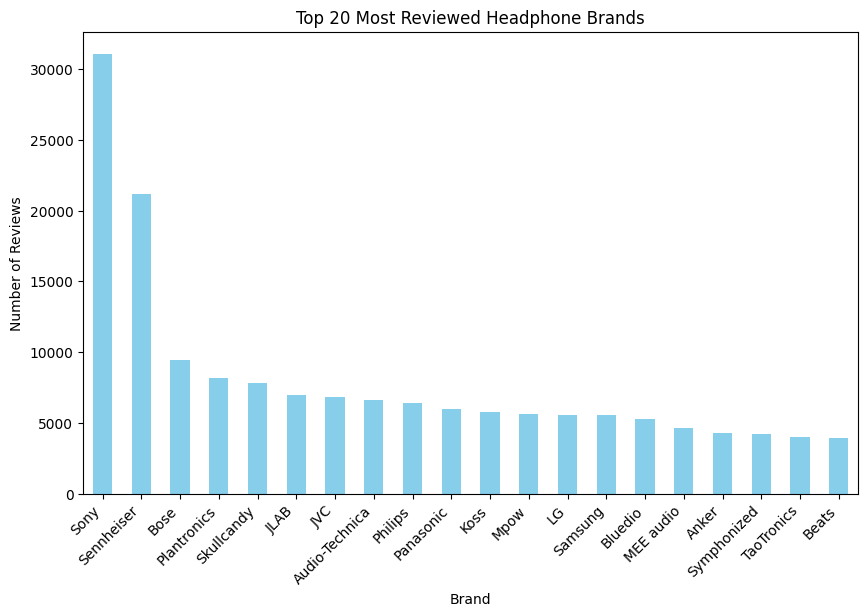

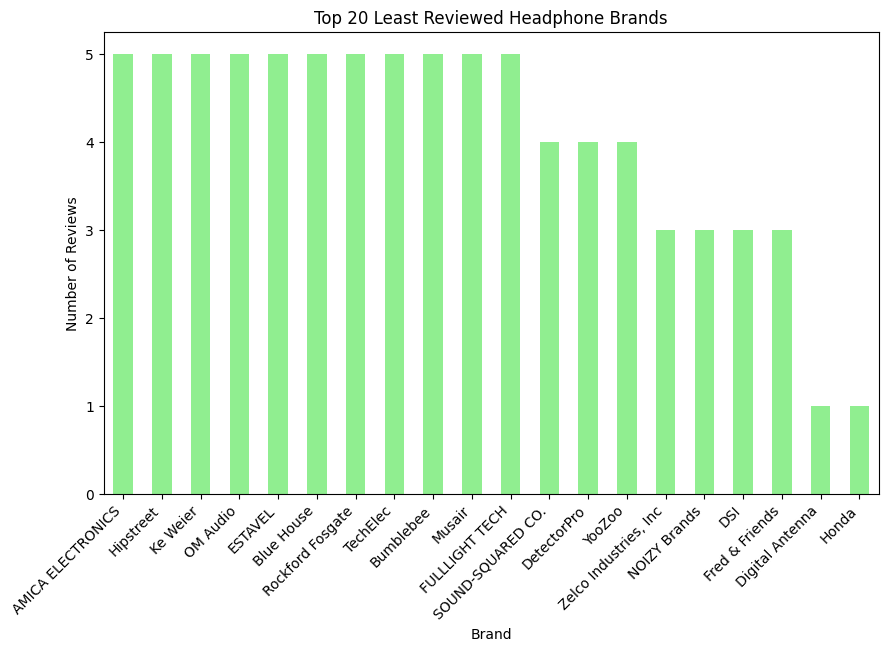

In [180]:
# a. Top 20 most reviewed brands
reviews_df['brand'] = reviews_df['asin'].map(asin_to_brand)
most_reviewed_brands = reviews_df['brand'].value_counts().head(20)
most_reviewed_brands.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Top 20 Most Reviewed Headphone Brands')
plt.xlabel('Brand')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45, ha='right')
plt.show()

# b. Top 20 least reviewed brands
least_reviewed_brands = reviews_df['brand'].value_counts().tail(20)
least_reviewed_brands.plot(kind='bar', figsize=(10, 6), color='lightgreen')
plt.title('Top 20 Least Reviewed Headphone Brands')
plt.xlabel('Brand')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45, ha='right')
plt.show()

In [181]:
most_positive_review = reviews_df[reviews_df['overall'] == 5]['asin'].value_counts().idxmax()
most_positive_brand = asin_to_brand.get(most_positive_review, 'Unknown')
print(f"The most positively reviewed headphone is from the brand: {most_positive_brand}")


The most positively reviewed headphone is from the brand: Sony


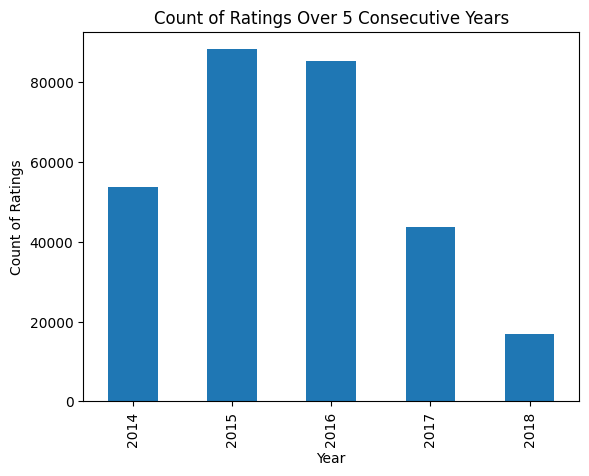

In [183]:
file_path = '/kaggle/working/pre_headphones.json'  
df = pd.read_json(file_path, lines=True)

df['year'] = pd.to_datetime(df['reviewTime']).dt.year
ratings_over_years = df.groupby('year')['overall'].count().tail(5)
ratings_over_years.plot(kind='bar', title='Count of Ratings Over 5 Consecutive Years')
plt.xlabel('Year')
plt.ylabel('Count of Ratings')
plt.show()


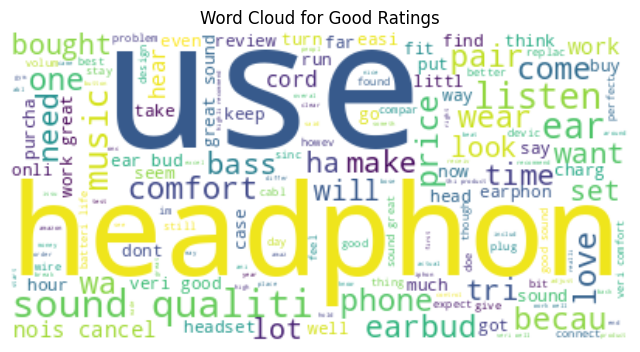

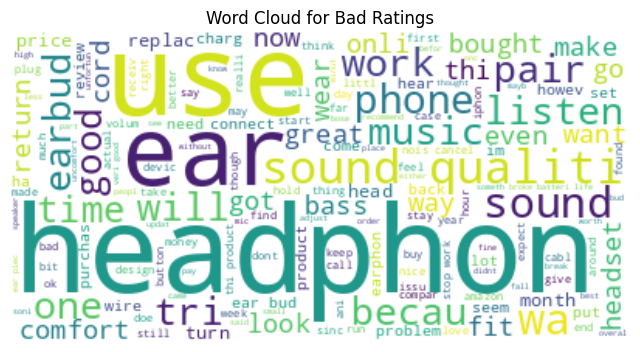

In [187]:
good_reviews_text = ' '.join(df[df['overall'] >= 4]['processed_reviewText'])
bad_reviews_text = ' '.join(df[df['overall'] < 4]['processed_reviewText'])

# word cloud image for 20 good reviews
wordcloud_good = WordCloud(background_color='white').generate(good_reviews_text)
plt.figure(figsize=(8, 6))
plt.imshow(wordcloud_good, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for Good Ratings")
plt.show()

#word cloud image for 20 bad reviews
wordcloud_bad = WordCloud(background_color='white').generate(bad_reviews_text)
plt.figure(figsize=(8, 6))
plt.imshow(wordcloud_bad, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for Bad Ratings")
plt.show()


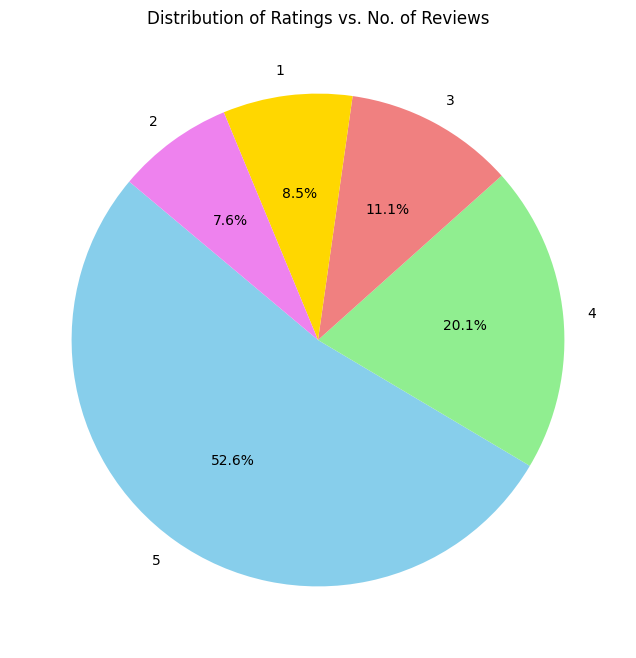

In [190]:
ratings_distribution = reviews_df['overall'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(ratings_distribution, labels=ratings_distribution.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen', 'lightcoral', 'gold', 'violet'])
plt.title('Distribution of Ratings vs. No. of Reviews')
plt.show()

In [191]:
print(df.columns)

Index(['overall', 'vote', 'verified', 'reviewTime', 'reviewerID', 'asin',
       'style', 'reviewerName', 'reviewText', 'summary', 'unixReviewTime',
       'image', 'processed_reviewText'],
      dtype='object')


In [201]:
reviews_df['reviewTime'] = pd.to_datetime(reviews_df['reviewTime'])
reviews_df['year'] = reviews_df['reviewTime'].dt.year
max_reviews_year = reviews_df.groupby('year')['reviewerID'].count().idxmax()
print(f"Year with the maximum reviews: {max_reviews_year}")


Year with the maximum reviews: 2015


In [202]:

highest_customers_year = reviews_df.groupby('year')['reviewerID'].nunique().idxmax()
print(f"The year with the highest number of customers is: {highest_customers_year}")


The year with the highest number of customers is: 2016


PART-7

In [185]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report

file_path = '/kaggle/working/pre_headphones.json'  
df = pd.read_json(file_path, lines=True)

X = df['processed_reviewText']  
y = df['overall'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [203]:
count_vect = CountVectorizer()

X_train_counts = count_vect.fit_transform(X_train)

X_test_counts = count_vect.transform(X_test)


In [204]:
tfidf_vect = TfidfVectorizer()

X_train_tfidf = tfidf_vect.fit_transform(X_train)

X_test_tfidf = tfidf_vect.transform(X_test)

In [205]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=1000)

logreg.fit(X_train_tfidf, y_train)

predicted_logreg = logreg.predict(X_test_tfidf)

print(f"Accuracy with Logistic Regression: {accuracy_score(y_test, predicted_logreg)}")



Accuracy with Logistic Regression: 0.6520258206290345


PART-8
Dividing the Rating Class into 3 categories

In [310]:
import pandas as pd

file_path = 'pre_headphones.json'  
df = pd.read_json(file_path, lines=True)

def categorize_rating(rating):
    if rating > 3:
        return 'Good'
    elif rating == 3:
        return 'Average'
    else: 
        return 'Bad'

df['rating_category'] = df['overall'].apply(categorize_rating)

print(df.columns)



Index(['overall', 'vote', 'verified', 'reviewTime', 'reviewerID', 'asin',
       'style', 'reviewerName', 'reviewText', 'summary', 'unixReviewTime',
       'image', 'processed_reviewText', 'rating_category'],
      dtype='object')


PART-9
Dividing the data into Train and Test Data in the ratio of 75:25

In [312]:
from sklearn.model_selection import train_test_split

X = df['processed_reviewText']  
y = df['rating_category']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train.to_json('X_train.json', lines=True, orient='records')
X_test.to_json('X_test.json', lines=True, orient='records')
y_train.to_json('y_train.json', lines=True, orient='records')
y_test.to_json('y_test.json', lines=True, orient='records')

len(X_train), len(X_test), len(y_train), len(y_test)

(273037, 91013, 273037, 91013)

In [291]:
print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")

Training set size: 273037
Test set size: 91013


PART-10
Comparing the performance of 5 Machine Learning based models

In [296]:
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression, SGDClassifier, PassiveAggressiveClassifier
from sklearn.svm import LinearSVC


In [297]:
def evaluate_model(model, X_train, y_train, X_test, y_test, model_name="Model"):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(f"Evaluating {model_name}:")
    print(classification_report(y_test, predictions, digits=4))
    print("-" * 60)


In [ ]:

models = [
    LogisticRegression(max_iter=1000, class_weight='balanced'),
    MultinomialNB(),
    LinearSVC(),
    SGDClassifier(loss='hinge'),
    PassiveAggressiveClassifier(max_iter=1000)
]

model_names = [
    "Logistic Regression",
    "Multinomial Naive Bayes",
    "Linear SVC",
    "SGD Classifier (SVM)",
    "Passive Aggressive Classifier"
]

for model, name in zip(models, model_names):
    evaluate_model(model, X_train_tfidf, y_train, X_test_tfidf, y_test, model_name=name)


PART-11
Collaborative Filtering 

A- User-item rating matrix

In [300]:
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
from sklearn.model_selection import KFold

file_path = 'pre_headphones.json'
df = pd.read_json(file_path, lines=True)

subset_df = df.iloc[:1000]

user_ids = subset_df['reviewerID'].astype("category").cat.codes
item_ids = subset_df['asin'].astype("category").cat.codes

user_item_matrix = csr_matrix((subset_df["overall"], (user_ids, item_ids)), shape=(user_ids.max() + 1, item_ids.max() + 1))

print(user_item_matrix)

  (0, 0)	1
  (1, 9)	5
  (2, 6)	4
  (3, 5)	4
  (4, 12)	5
  (5, 11)	5
  (6, 9)	5
  (7, 9)	1
  (8, 8)	2
  (9, 12)	5
  (10, 9)	3
  (11, 5)	5
  (12, 9)	2
  (13, 9)	5
  (14, 9)	5
  (15, 9)	5
  (16, 5)	5
  (17, 9)	5
  (18, 11)	5
  (19, 9)	5
  (20, 0)	3
  (21, 9)	1
  (22, 9)	3
  (23, 9)	5
  (24, 9)	5
  :	:
  (968, 6)	5
  (969, 12)	4
  (970, 9)	5
  (971, 6)	4
  (972, 9)	5
  (973, 9)	5
  (974, 8)	5
  (975, 6)	2
  (976, 11)	4
  (977, 5)	5
  (978, 12)	4
  (979, 12)	5
  (980, 9)	5
  (981, 0)	5
  (982, 5)	5
  (983, 5)	5
  (984, 9)	3
  (985, 8)	5
  (986, 12)	5
  (987, 9)	5
  (988, 9)	1
  (989, 5)	3
  (990, 11)	5
  (991, 6)	5
  (992, 4)	4


B- Normalizing the ratings

In [301]:
from scipy.sparse import coo_matrix

def min_max_scale_csr(matrix):
    coo = matrix.tocoo()
    data_scaled = []
    
    for user_id in range(matrix.shape[0]):
        user_ratings = matrix.getrow(user_id).data
        if user_ratings.size > 0:
            min_rating = user_ratings.min()
            max_rating = user_ratings.max()
            if max_rating != min_rating:
                scaled_ratings = (user_ratings - min_rating) / (max_rating - min_rating)
                data_scaled.extend(scaled_ratings)
            else:
                data_scaled.extend([1] * user_ratings.size)
        else:
            continue

    matrix_scaled = coo_matrix((data_scaled, (coo.row, coo.col)), shape=matrix.shape)
    return matrix_scaled.tocsr()

user_item_matrix_scaled = min_max_scale_csr(user_item_matrix)
print(user_item_matrix_scaled)


  (0, 0)	1.0
  (1, 9)	1.0
  (2, 6)	1.0
  (3, 5)	1.0
  (4, 12)	1.0
  (5, 11)	1.0
  (6, 9)	1.0
  (7, 9)	1.0
  (8, 8)	1.0
  (9, 12)	1.0
  (10, 9)	1.0
  (11, 5)	1.0
  (12, 9)	1.0
  (13, 9)	1.0
  (14, 9)	1.0
  (15, 9)	1.0
  (16, 5)	1.0
  (17, 9)	1.0
  (18, 11)	1.0
  (19, 9)	1.0
  (20, 0)	1.0
  (21, 9)	1.0
  (22, 9)	1.0
  (23, 9)	1.0
  (24, 9)	1.0
  :	:
  (968, 6)	1.0
  (969, 12)	1.0
  (970, 9)	1.0
  (971, 6)	1.0
  (972, 9)	1.0
  (973, 9)	1.0
  (974, 8)	1.0
  (975, 6)	1.0
  (976, 11)	1.0
  (977, 5)	1.0
  (978, 12)	1.0
  (979, 12)	1.0
  (980, 9)	1.0
  (981, 0)	1.0
  (982, 5)	1.0
  (983, 5)	1.0
  (984, 9)	1.0
  (985, 8)	1.0
  (986, 12)	1.0
  (987, 9)	1.0
  (988, 9)	1.0
  (989, 5)	1.0
  (990, 11)	1.0
  (991, 6)	1.0
  (992, 4)	1.0


C 1- Top N similar users

In [302]:
def calculate_mae(similarities, ratings, n_similar):
    mae = 0
    n_users = similarities.shape[0]
    for user_id in range(n_users):
        if user_id >= ratings.shape[0]:
            continue
        similar_users = np.argsort(-similarities[user_id])[:n_similar]
        similar_users = [u for u in similar_users if u < ratings.shape[0]]
        user_ratings = ratings.getrow(user_id).toarray().flatten()
        n_actual_similar = len(similar_users)
        if n_actual_similar > 0:
            predicted_ratings = ratings[similar_users].mean(axis=0)
            mae += np.sum(np.abs(predicted_ratings - user_ratings)) / n_actual_similar
        else:
            mae += np.sum(np.abs(user_ratings)) / n_similar
    return mae / n_users


C 2- K-folds validation

In [303]:
kf = KFold(n_splits=5)
mae_scores = {n: [] for n in [10, 20, 30, 40, 50]}
def compute_cosine_similarity(matrix):

    magnitudes = np.sqrt((matrix.power(2)).sum(axis=1))
    epsilon = 1e-9
    normalized_matrix = matrix.multiply(1 / (magnitudes + epsilon)).tocsr()
    
    similarity_matrix = normalized_matrix.dot(normalized_matrix.T)
    
    return similarity_matrix

for train_index, test_index in kf.split(user_item_matrix_scaled):
    train_matrix, test_matrix = user_item_matrix_scaled[train_index], user_item_matrix_scaled[test_index]
    similarities = compute_cosine_similarity(train_matrix)
    
    for n in [10, 20, 30, 40, 50]:
        mae = calculate_mae(similarities, test_matrix, n)
        mae_scores[n].append(mae)


C 3,4- MAE(Mean Absolute Error) 


In [304]:
for n, scores in mae_scores.items():
    print(f'MAE for {n} similar users: {np.mean(scores)}')


MAE for 10 similar users: 0.39498534607037056
MAE for 20 similar users: 0.39498534607037056
MAE for 30 similar users: 0.39498534607037056
MAE for 40 similar users: 0.39498534607037056
MAE for 50 similar users: 0.39498534607037056


D- Item-Item recommender system

In [305]:
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix, coo_matrix
from sklearn.model_selection import KFold

file_path = 'pre_headphones.json'
df = pd.read_json(file_path, lines=True)

subset_df = df.iloc[:1000]

user_ids = subset_df['reviewerID'].astype("category").cat.codes
item_ids = subset_df['asin'].astype("category").cat.codes

item_user_matrix = csr_matrix((subset_df["overall"], (item_ids, user_ids)), shape=(item_ids.max() + 1, user_ids.max() + 1))

item_user_matrix_scaled = min_max_scale_csr(item_user_matrix)

item_similarities = compute_cosine_similarity(item_user_matrix_scaled.T)

kf = KFold(n_splits=5)
mae_scores = {n: [] for n in [10, 20, 30, 40, 50]}

for train_index, test_index in kf.split(item_user_matrix_scaled.T):
    train_matrix, test_matrix = item_user_matrix_scaled.T[train_index], item_user_matrix_scaled.T[test_index]
    similarities = compute_cosine_similarity(train_matrix)
    
    for n in [10, 20, 30, 40, 50]:
        mae = calculate_mae(similarities, test_matrix, n)
        mae_scores[n].append(mae)

for n, scores in mae_scores.items():
    print(f'MAE for {n} similar items: {np.mean(scores)}')

MAE for 10 similar items: 0.27378538725979434
MAE for 20 similar items: 0.27378538725979434
MAE for 30 similar items: 0.27378538725979434
MAE for 40 similar items: 0.27378538725979434
MAE for 50 similar items: 0.27378538725979434


E- Plotting
MAE against K


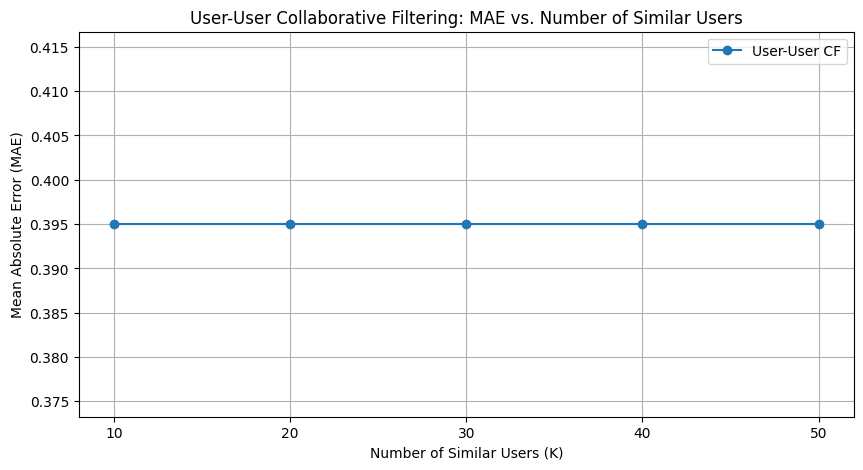

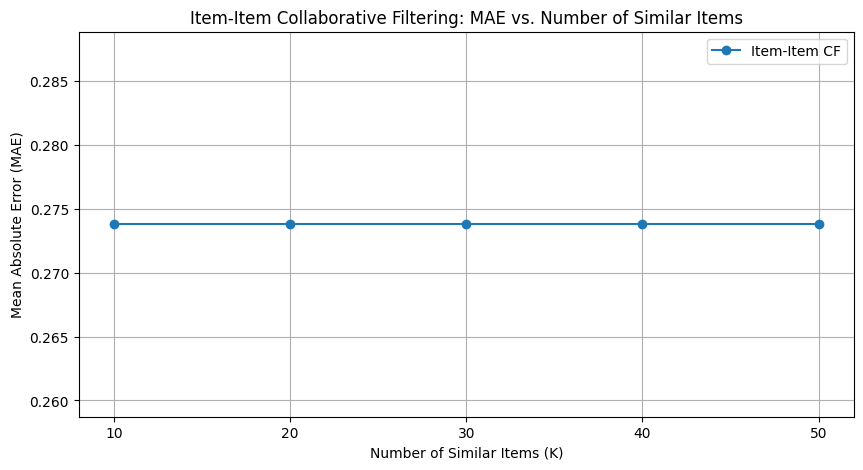

In [247]:
import matplotlib.pyplot as plt


mae_scores_user_user = {
    10: [0.39498534607037056],
    20: [0.39498534607037056],
    30: [0.39498534607037056],
    40: [0.39498534607037056],
    50: [0.39498534607037056]
}

mae_scores_item_item = {
    10: [0.27378538725979434],
    20: [0.27378538725979434],
    30: [0.27378538725979434],
    40: [0.27378538725979434],
    50: [0.27378538725979434]
}

plt.figure(figsize=(10, 5))
plt.plot(list(mae_scores_user_user.keys()), [np.mean(v) for v in mae_scores_user_user.values()], label='User-User CF', marker='o')
plt.title('User-User Collaborative Filtering: MAE vs. Number of Similar Users')
plt.xlabel('Number of Similar Users (K)')
plt.ylabel('Mean Absolute Error (MAE)')
plt.xticks(list(mae_scores_user_user.keys()))
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(list(mae_scores_item_item.keys()), [np.mean(v) for v in mae_scores_item_item.values()], label='Item-Item CF', marker='o')
plt.title('Item-Item Collaborative Filtering: MAE vs. Number of Similar Items')
plt.xlabel('Number of Similar Items (K)')
plt.ylabel('Mean Absolute Error (MAE)')
plt.xticks(list(mae_scores_item_item.keys()))
plt.grid(True)
plt.legend()
plt.show()


12- TOP 10 products by User Sum Ratings

In [248]:
asin_to_product_name = {}

for chunk in pd.read_json(metadata_path, lines=True, chunksize=chunk_size_metadata):
    headphones_chunk = chunk[chunk['category'].apply(lambda x: 'Headphones' in str(x))]
    for _, row in headphones_chunk.iterrows():
        asin = row['asin']
        brand = row.get('brand', 'Unknown')
        product_name = row.get('title', 'No Title') 
        headphones_asins.add(asin)
        asin_to_brand[asin] = brand
        asin_to_product_name[asin] = product_name

reviews_df['product_name'] = reviews_df['asin'].map(asin_to_product_name)

top_products_by_ratings = reviews_df.groupby(['asin', 'product_name'])['overall'].sum().sort_values(ascending=False).head(10)

top_products_by_ratings



asin        product_name                                                                                                                                                                                   
B004WODP20  Sony MDRZX100 Headphones (Black)                                                                                                                                                                   13167
B00BN0N0LW  Sony MDRZX100 ZX Series Stereo Headphones (Blue)                                                                                                                                                   13114
B00LP6CFEC  Toysdone Wireless Headphones Stereo Earbuds Wireless Sport Earphones for Running with Mic (6 Hours Play Time, IPX4 Sweatproof, Secure Ear Hooks Design)-Black/Green                                10439
B00STP86CW  Xbrn Dual Ports Adapter Splitter, 2 in 1 Headphone Jack Aux Audio &amp; Charger Adapter Cable Connector Compactible for Ip7/ 7 Plus/ 8/Plus/X (Su